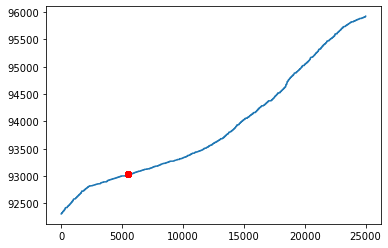

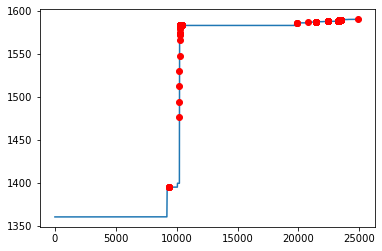

In [13]:
import numpy
import random
import csv
import matplotlib.pyplot as plt

class qbs:
    def __init__(self, Q1, Q3, IQR, min_, max_, anomalies):
        self.Q1 = Q1;
        self.Q3 = Q3;
        self.IQR = IQR;
        self.min_ = min_;
        self.max_ = max_;
        self.anomalies = [];
        
    def calculate_parameters(self, data):
        self.Q1 = numpy.quantile(data, 0.25);
        self.Q3 = numpy.quantile(data, 0.75);
        self.IQR = self.Q3 - self.Q1;
        self.max_ = self.Q3 + 1.5 * self.IQR;
        self.min_ = self.Q1 - 1.5 * self.IQR;
       
    def detect_anomalies(self, data, window_size):
        for i in range(0, len(data)-window_size+1, 1):
            current_data = [data [i:i+window_size] ]
            self.calculate_parameters(current_data)
            if(data[i+window_size-1] < self.min_ or data[i+window_size-1] > self.max_ and self.max_!=self.min_):
                #print("Mamy anomalie w miejscu: ",i+window_size-1,"\nWartosc oczekiwana: <",self.min_,",",self.max_,">")
                #print("Wartosc w tym miejscu: ",data[i+window_size-1],"\n")
                self.anomalies.append([i+window_size-1, data[i+window_size-1]])
        
x = qbs(0,0,0,0,0,0)  

with open('Budynek_1_woda_historia.csv') as file:
    reader = csv.reader(file)
    data = numpy.zeros(25002)  
    count = 0
    i=0
    for row in reader:
        data[i] = row[0][29:36]
        i+=1
        if count >25000:
            break
        count+=1
            
y1 = x.detect_anomalies(data, 1000)

t = numpy.arange(0, 25002)
plt.plot(t, data)
for i in range(0, len(x.anomalies)):
    plt.plot(x.anomalies[i][0], x.anomalies[i][1], 'ro')
plt.show()


with open('Budynek_1_woda_przyklad.csv') as file:
    reader = csv.reader(file)
    data = numpy.zeros(25002)  
    count = 0
    i=0
    for row in reader:
        data[i] = row[0][29:36]
        i+=1
        if count >25000:
            break
        count+=1
            
x = qbs(0,0,0,0,0,0)  
y2 = x.detect_anomalies(data, 700) 
t = numpy.arange(0, 25002)
plt.plot(t, data)
for i in range(0, len(x.anomalies)):
    plt.plot(x.anomalies[i][0], x.anomalies[i][1], 'ro')
plt.show()
